# Težina ribe - 3. zadaća
Cilj je analizirati, razumjeti i donijeti zaključke o mogućnosti predviđanja težine ribe. Razviti model koji predviđa težinu na osnovu drugih parametara (nasumično podijeliti podatke na setove za obuku, validaciju i testiranje).

## Uvoz potrebnih biblioteka
Biblioteke koje omogućavaju rad sa podacima, skaliranje, podjelu podataka i izgradnju modela
import pandas as pd

1. import pandas as pd - obrada i analiza podataka. Manipulacija podacima u tablicama, kao što su DataFrameovi, omogućujući rad s podacima u CSV formatu.

2. import numpy as np - rad s numeričkim podacima. Koristi se za matematičke operacije, rad s nizovima i upravljanje numeričkim strukturama podataka.

3. from sklearn.model_selection import train_test_split - Funkcija train_test_split iz scikit-learn biblioteke koristi se za podjelu skupa podataka na različite dijelove (skupove za obuku, validaciju i testiranje) kako bi se model mogao razviti, testirati i evaluirati.

4. from sklearn.preprocessing import LabelEncoder, StandardScaler:
    LabelEncoder pretvara kategorijalne podatke u numeričke vrijednosti kako bi model mogao raditi s njima.
    StandardScaler standardizira karakteristike tako da imaju srednju vrijednost 0 i standardnu devijaciju 1, što pomaže kod modela osjetljivih na različite skale podataka.

5. from sklearn.linear_model import LinearRegression - LinearRegression je klasa koja implementira linearni regresijski model. Koristi se za predviđanje kontinuiranih vrijednosti na osnovu ulaznih karakteristika.

6. from sklearn.metrics import mean_squared_error, r2_score:
    mean_squared_error mjeri prosječnu kvadratnu razliku između stvarnih i predviđenih vrijednosti, što je metrika za ocjenjivanje modela.
    r2_score daje koeficijent determinacije koji pokazuje koliko dobro model objašnjava varijaciju ciljne varijable.

7. import matplotlib.pyplot as plt - Matplotlib je biblioteka za kreiranje grafova i vizualizacija. pyplot je modul koji omogućava jednostavno kreiranje različitih vrsta grafova, kao što su scatter grafovi, linijski grafovi itd.

8. import seaborn as sns - Seaborn je biblioteka za naprednu vizualizaciju podataka koja radi na temelju Matplotlib-a. Omogućava kreiranje estetski ugodnih i informativnih grafova.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Učitavanje skupa podataka
- Učitava se CSV datoteku koja sadrži informacije o ribama
- Kolone uključuju vrstu ribe, dužine, visinu, širinu i težinu

In [3]:
data = pd.read_csv('Fish.csv')

## Prikaz osnovnih informacija o skupu podataka
Prikazuju se tipovi podataka, postojeće (ne-null) vrijednosti i osnovnu statistiku

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25

## Provjera nedostajućih vrijednosti
Provjerava postoji li bilo koja kolona gdje nedostaju vrijednosti

In [5]:
print("\nNedostajuće vrijednosti:")
print(data.isnull().sum())


Nedostajuće vrijednosti:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


## Enkodiranje kategorijalne kolone 'Species'
Transformiše kategorijalne vrijednosti (vrste ribe) u numeričke vrijednosti

1. le = LabelEncoder() Kreira instancu LabelEncoder, koja je alat za pretvaranje kategorijalnih vrijednosti (npr. imena riba kao što su "Bream", "Roach", "Pike") u numeričke oznake. Ovaj alat se koristi zato što modeli mašinskog učenja zahtijevaju numeričke podatke za obradu, a ne mogu direktno raditi s tekstualnim podacima.
2. data['Species'] = le.fit_transform(data['Species'])
    fit_transform:
    fit analizira kolonu Species kako bi identifikovao jedinstvene kategorije. Na primjer, ako su kategorije u koloni: ["Bream", "Roach", "Pike", "Bream", "Pike"]
    LabelEncoder dodijeli jedinstvene numeričke oznake svakom tipu:
    "Bream" -> 0
    "Roach" -> 1
    "Pike" -> 2
    transform pretvara sve vrijednosti u koloni u odgovarajuće numeričke oznake: [0, 1, 2, 0, 2]

In [6]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

## Odvajanje karakteristika i ciljne varijable
Karakteristike su sve osim težine, dok je težina ciljana varijabla

1. X = data.drop(columns=['Weight'])
    Funkcija drop uklanja kolonu Weight iz DataFrame-a data. Sve preostale kolone čine ulazne karakteristike (features). Promjenljiva X sada sadrži sve podatke osim ciljne varijable (Weight), jer su te informacije potrebne modelu kao ulazi za predviđanje. Cilj modela je da koristi ulazne karakteristike da bi predvidio ciljnu varijablu. Zato treba odvojiti te dvije vrste podataka.
2. y = data['Weight']
    Iz DataFrame-a data izdvaja se samo kolonu Weight, koja predstavlja ciljnu varijablu. Promjenljiva y sada sadrži vrijednosti težine ribe, što model pokušava predvidjeti. Promjenljiva y postaje jednodimenzionalni niz (ili serija) sa vrijednostima težine.

In [7]:
X = data.drop(columns=['Weight'])
y = data['Weight'] 

## Standardizacija karakteristika
Skaliraju se podaci kako bi svi atributi imali istu važnost za model

1. scaler = StandardScaler()
    Ovdje se kreira objekat StandardScaler iz biblioteke sklearn.preprocessing.
    StandardScaler je alat koji standardizuje podatke tako da imaju:
    Srednju vrijednost (mean) = 0
    Standardnu devijaciju (standard deviation) = 1
    Neki algoritmi mašinskog učenja (npr. linearna regresija, SVM) osjetljivi su na skale podataka. Standardizacija poboljšava performanse modela tako što osigurava da sve karakteristike budu na sličnom rasponu.
2. X_scaled = scaler.fit_transform(X)
    fit_transform:
    fit: Računa srednju vrijednost i standardnu devijaciju za svaku kolonu u X.
    transform: Koristi te vrijednosti za skaliranje podataka.
    Svi podaci u X se transformiraju tako da svaki atribut ima:
    Srednju vrijednost (mean) = 0   
    Standardnu devijaciju (standard deviation) = 1.
    Promjenljiva X_scaled sada sadrži standardizovane vrijednosti originalnog X.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Podjela podataka na skupove za obuku, validaciju i testiranje
Treniranje: 70% podataka, Validacija i testiranje: 15% svaki

1. Prva podjela:
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    train_test_split funkcija iz sklearn.model_selection biblioteke koristi se za podjelu podataka.
    X_scaled je ulazni skup podataka (standardizirani podaci), a y je ciljana varijabla (težina ribe).
    Ovdje se 30% podataka (definirano sa test_size=0.3) koristi za privremeni skup (X_temp, y_temp), dok ostatak od 70% ide za skup za obuku (X_train, y_train).
    random_state=42 postavlja fiksnu vrijednost za slučajnu podjelu podataka, što omogućava ponovljivost rezultata.

2. Druga podjela:
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    Ovdje se iz preostalih 30% podataka (X_temp, y_temp) pravi nova podjela na dva skupa: skup za validaciju (X_val, y_val) i skup za testiranje (X_test, y_test).
    test_size=0.5 znači da se polovica od 30% podataka koristi za validaciju, a druga polovica za testiranje, tako da na kraju imamo 70% podataka za obuku, 15% za validaciju i 15% za testiranje.

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Treniranje linearnog regresijskog modela
Kreira se i trenira model koristeći podatke za obuku

1. model = LinearRegression()
    Ovdje se kreira objekat model tipa LinearRegression iz biblioteke sklearn.linear_model. LinearRegression je klasa koja implementira linearni regresijski model. Linearna regresija je metoda koja pokušava pronaći vezu između jedne ili više nezavisnih varijabli (ulaznih karakteristika) i zavisne varijable (ciljne varijable). U ovom slučaju, ciljna varijabla je težina ribe (Weight), a ulazne karakteristike su druge varijable (kao što su dužina, širina, visina i vrsta ribe).

2. model.fit(X_train, y_train)
    Funkcija fit() trenira model na podacima. U ovom slučaju, koristi podatke za obuku (X_train i y_train):
    - X_train sadrži ulazne karakteristike (sve osim težine ribe),
    - y_train sadrži ciljne vrijednosti (težine riba).
    fit() funkcija pronalazi najbolje koeficijente (težine) koji minimiziraju grešku između predviđenih i stvarnih vrijednosti težine ribe na skupu za obuku. Ovo se postiže rješenjem sistema jednačina koji odgovara linearnoj regresiji.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluacija na validacionom skupu
Validacija služi za prilagođavanje modela i procjenu performansi prije testiranja

1. y_val_pred = model.predict(X_val)
    Ovdje se koristi trenirani model da predvidi ciljne vrijednosti (težine riba) za ulazne karakteristike u validacijskom skupu podataka (X_val). Rezultat predviđanja (y_val_pred) bit će niz predviđenih vrijednosti težine riba temeljen na ulaznim podacima.
2. val_mse = mean_squared_error(y_val, y_val_pred)
    Funkcija mean_squared_error iz biblioteke sklearn.metrics koristi stvarne ciljne vrijednosti (y_val) i predviđene ciljne vrijednosti (y_val_pred) kako bi izračunala srednju kvadratnu grešku (MSE).
    MSE se računa kao prosjek kvadrata razlika između stvarnih i predviđenih vrijednosti. Manja vrijednost MSE označava bolju tačnost modela.
3. val_r2 = r2_score(y_val, y_val_pred)
    Funkcija r2_score iz biblioteke sklearn.metrics izračunava R-squared (R²), što je mjera koja pokazuje koliko dobro model objašnjava varijaciju u podacima.
4. print(f"Validacijski MSE: {val_mse}")
    Ispisuje srednju kvadratnu grešku (MSE) za validacijski skup podataka.
5. print(f"Validacijski R^2: {val_r2}")
    Ispisuje R² vrijednost za validacijski skup podataka.

In [11]:
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validacijski MSE: {val_mse}")
print(f"Validacijski R^2: {val_r2}")

Validacijski MSE: 15491.422008810148
Validacijski R^2: 0.82701210507971


## Evaluacija na testnom skupu
Testiranje konačno procjenjuje sposobnost modela na nepoznatim podacima

1. test_mse = mean_squared_error(y_test, y_test_pred)
    Funkcija mean_squared_error računa srednju kvadratnu grešku (MSE) između stvarnih ciljeva (y_test) i predviđenih ciljeva (y_test_pred). Manja vrijednost MSE znači da je model precizniji u predviđanjima na testnim podacima.
2. test_r2 = r2_score(y_test, y_test_pred)
    Funkcija r2_score izračunava R-squared (R²) za testni skup podataka. R² označava koliko dobro model objašnjava varijaciju u stvarnim podacima, uzimajući u obzir sve varijante koje model nije uspio predvidjeti. R² vrijednost blizu 1 ukazuje na to da model objašnjava većinu varijacije u testnim podacima.
3. print(f"Testni MSE: {test_mse}")
    Ispisuje srednju kvadratnu pogrešku (MSE) za testni skup podataka.
4. print(f"Testni R^2: {test_r2}")
    Ispisuje R² vrijednost za testni skup podataka.

In [12]:
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testni MSE: {test_mse}")
print(f"Testni R^2: {test_r2}")

Testni MSE: 12583.23052904848
Testni R^2: 0.9167119419553234


## Vizualizacija predikcija naspram stvarnih vrijednosti
Scatter plot prikazuje tačnost predviđanja modela

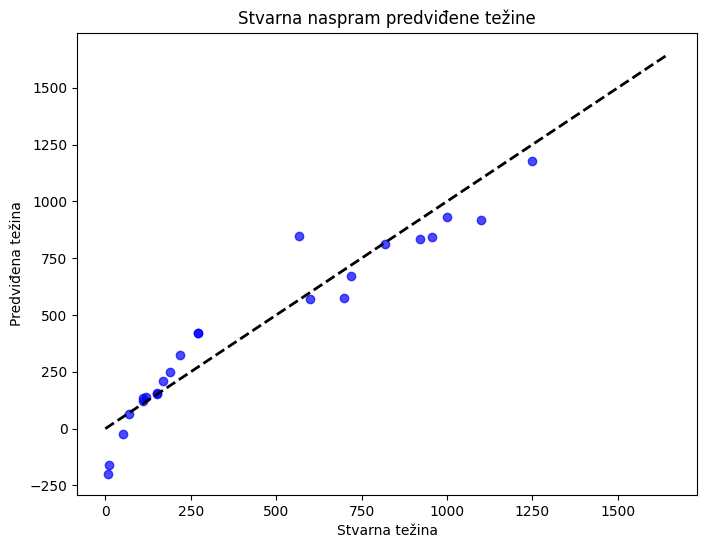

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Stvarna težina')
plt.ylabel('Predviđena težina')
plt.title('Stvarna naspram predviđene težine')
plt.show()

## Analiza značaja karakteristika
Prikazuje utjecaj pojedinih karakteristika na predikciju težine

In [14]:
coefficients = model.coef_
feature_importance = pd.DataFrame({
    'Karakteristika': data.columns[:-1],  # Sve osim 'Weight'
    'Koeficijent': coefficients
})
print("\nZnačaj karakteristika:")
print(feature_importance.sort_values(by='Koeficijent', ascending=False))


Značaj karakteristika:
  Karakteristika  Koeficijent
2        Length1   848.954137
4        Length3   178.002452
0        Species    48.666804
5         Height   -18.154955
1         Weight   -44.265028
3        Length2  -553.354468
